## NLTK speech tagging

Given a sentence or paragraph, it can label words such as verbs, nouns and so on.

In [1]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer, sent_tokenize, word_tokenize

nltk.download('averaged_perceptron_tagger')

In [2]:
document = 'Whether you\'re new to programming or an experienced developer, it\'s easy to learn and use Python.'
print(document)

Whether you're new to programming or an experienced developer, it's easy to learn and use Python.


In [3]:
sentences = sent_tokenize(document)
print(sentences)

["Whether you're new to programming or an experienced developer, it's easy to learn and use Python."]


In [4]:
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Whether', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('new', 'JJ'), ('to', 'TO'), ('programming', 'VBG'), ('or', 'CC'), ('an', 'DT'), ('experienced', 'JJ'), ('developer', 'NN'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('and', 'CC'), ('use', 'VB'), ('Python', 'NNP'), ('.', '.')]


where the second element of the tuple is the class.
The meanings of these speech codes are shown in the table below:

### The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.

* CC coordinating conjunction
* CD cardinal digit
* DT determiner
* EX existential there (like: “there is” … think of it like “there exists”)
* FW foreign word
* IN preposition/subordinating conjunction
* JJ adjective ‘big’
* JJR adjective, comparative ‘bigger’
* JJS adjective, superlative ‘biggest’
* LS list marker 1)
* MD modal could, will
* NN noun, singular ‘desk’
* NNS noun plural ‘desks’
* NNP proper noun, singular ‘Harrison’
* NNPS proper noun, plural ‘Americans’
* PDT predeterminer ‘all the kids’
* POS possessive ending parent’s
* PRP personal pronoun I, he, she
* PRP$ possessive pronoun my, his, hers
* RB adverb very, silently,
* RBR adverb, comparative better
* RBS adverb, superlative best
* RP particle give up
* TO, to go ‘to’ the store.
* UH interjection, errrrrrrrm
* VB verb, base form take
* VBD verb, past tense took
* VBG verb, gerund/present participle taking
* VBN verb, past participle taken
* VBP verb, sing. present, non-3d take
* VBZ verb, 3rd person sing. present takes
* WDT wh-determiner which
* WP wh-pronoun who, what
* WP$ possessive wh-pronoun whose
* WRB wh-abverb where, when

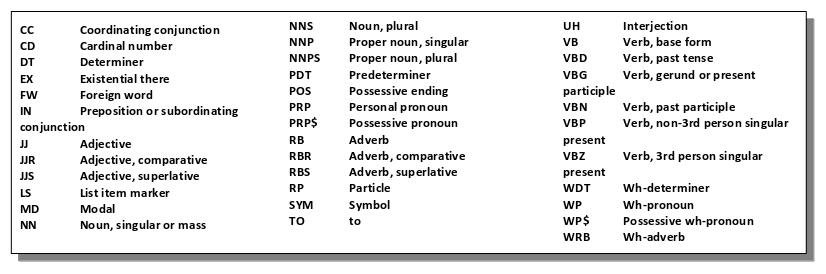

#### We can filter this data based on the type of word:

In [5]:
# import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [6]:
document = 'Today the Netherlands celebrates King\'s Day. To honor this tradition, the Dutch embassy in San Francisco invited me to'
print(document)

Today the Netherlands celebrates King's Day. To honor this tradition, the Dutch embassy in San Francisco invited me to


In [7]:
sentences = nltk.sent_tokenize(document)   

In [8]:
data = []
for sent in sentences:
    data = data + nltk.pos_tag(word_tokenize(sent))

In [9]:
for word in data: 
    if 'NNP' in word[1]:  #  'NNP' == word[1] or 'NNP' in words work too
        print(word)

('Netherlands', 'NNP')
('King', 'NNP')
('Day', 'NNP')
('San', 'NNP')
('Francisco', 'NNP')


#### Speech tagging
The classes include past tense, present. Using this technique we can quickly derive meaning from a text.

pip install -U spacy

python -m spacy download en_core_web_sm

In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
print(doc, type(doc), sep='\n')

print(6 * ' ')
print("%10s %10s %5s %4s %10s %6s %8s %7s" % ('text', 'lemma', 'pos', 'tag', 'dep', 'shape', 'is_alpha', 'is_stop'))

print(5 * ' ')
for token in doc:
    print("%10s %10s %5s %4s %10s %6s %8s %7s" % (token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop))

Apple is looking at buying U.K. startup for $1 billion
<class 'spacy.tokens.doc.Doc'>
      
      text      lemma   pos  tag        dep  shape is_alpha is_stop
     
     Apple      Apple PROPN  NNP      nsubj  Xxxxx     True   False
        is         be   AUX  VBZ        aux     xx     True    True
   looking       look  VERB  VBG       ROOT   xxxx     True   False
        at         at   ADP   IN       prep     xx     True    True
    buying        buy  VERB  VBG      pcomp   xxxx     True   False
      U.K.       U.K. PROPN  NNP   compound   X.X.    False   False
   startup    startup  NOUN   NN       dobj   xxxx     True   False
       for        for   ADP   IN       prep    xxx     True    True
         $          $   SYM    $   quantmod      $    False   False
         1          1   NUM   CD   compound      d    False   False
   billion    billion   NUM   CD       pobj   xxxx     True   False
